In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

# 股票流动性风险

In [21]:
data = w.wsd('881001.WI', 'close', '2010-01-01', '2018-07-12')

In [22]:
pdf = pd.DataFrame(data.Data[0], columns=['881001.WI'], index=data.Times)
pdf.index = pd.to_datetime(pdf.index)

In [5]:
st_li = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/amihud_liquidity.xlsx')

In [6]:
st_li['z'] = st_li['wdqa_corwin and schultz'].rolling(243).apply(lambda x: (x[-1] - x.mean()) / x.std())

In [7]:
st_li.loc[st_li['z'].abs() < 3, 'z'] = 0

In [23]:
yret = pdf['881001.WI'].resample('A').last().pct_change()

In [24]:
yret

2010-12-31         NaN
2011-12-31   -0.224183
2012-12-31    0.046796
2013-12-31    0.054406
2014-12-31    0.524395
2015-12-31    0.384978
2016-12-31   -0.129106
2017-12-31    0.049301
2018-12-31   -0.151622
Freq: A-DEC, Name: 881001.WI, dtype: float64

In [20]:
st_li['flag'] = st_li['z'] != 0
st_li['flag'].resample('A').sum()

2010-12-31    242.0
2011-12-31     11.0
2012-12-31      4.0
2013-12-31      6.0
2014-12-31      3.0
2015-12-31     28.0
2016-12-31      1.0
2017-12-31      4.0
2018-12-31      6.0
Freq: A-DEC, Name: flag, dtype: float64

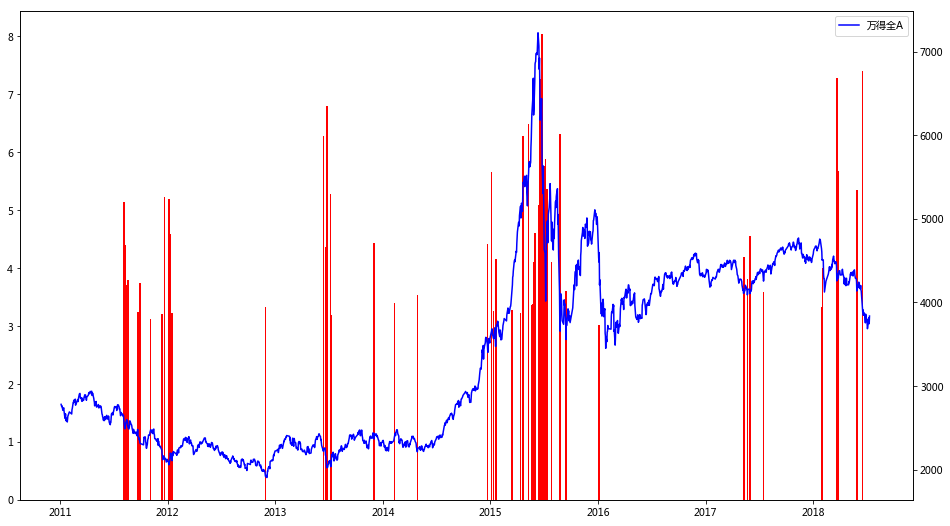

In [8]:
fig = plt.figure(figsize=(16, 9))
ax9 = fig.add_subplot(1, 1, 1)
ax9.bar(st_li.index, st_li['z'].abs(), color='red', width=5)
# ax9.set_title(u'股票流动性风险', fontsize=15)

ax99 = ax9.twinx()
ax99.plot(pdf.index, pdf['881001.WI'], label=u'万得全A', color='blue')
ax99.legend(loc='upper right')

# 债券流动性风险

In [40]:
data = w.wsd('CBA00102.CS', 'close', '2010-01-01', '2018-07-12')

In [41]:
pdf = pd.DataFrame(data.Data[0], columns=['CBA00102.CS'], index=data.Times)
pdf.index = pd.to_datetime(pdf.index)

In [42]:
bo_li = pd.read_excel('D:/Data/risk/bond_liquidity.xlsx', index_col=0)

In [43]:
bo_li['z'] = bo_li['ILLIQUIDITY'].rolling(window=243).apply(lambda x: (x[-1] - x.mean()) / x.std())

In [44]:
bo_li.loc[bo_li['z'].abs() < 2.5, 'z'] = 0

In [45]:
yret = pdf['CBA00102.CS'].resample('A').last().pct_change()
yret

2010-12-31         NaN
2011-12-31    0.012842
2012-12-31   -0.004145
2013-12-31   -0.044945
2014-12-31    0.055383
2015-12-31    0.033674
2016-12-31   -0.025265
2017-12-31   -0.041535
2018-12-31    0.021007
Freq: A-DEC, Name: CBA00102.CS, dtype: float64

In [46]:
bo_li['flag'] = bo_li['z'] != 0
bo_li['flag'].resample('A').sum()

TRADINGDAY
2011-12-31     45.0
2012-12-31    197.0
2013-12-31     22.0
2014-12-31      3.0
2015-12-31      3.0
2016-12-31     14.0
2017-12-31      2.0
2018-12-31     10.0
Freq: A-DEC, Name: flag, dtype: float64

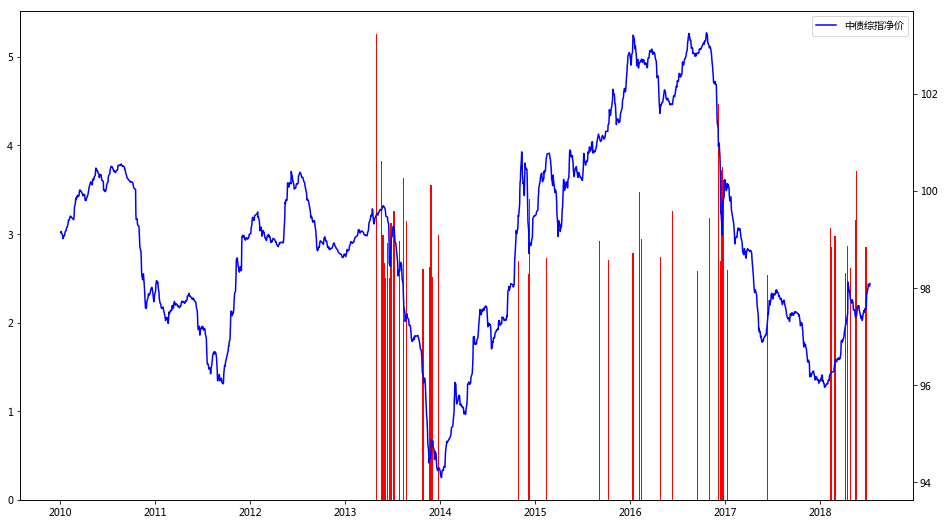

In [47]:
fig = plt.figure(figsize=(16, 9))
ax4 = fig.add_subplot(1, 1, 1)
ax4.bar(bo_li.index, bo_li['z'].abs(), color='red', width=5)
# ax4.set_title(u'债券流动性风险', fontsize=15)

ax44 = ax4.twinx()
ax44.plot(pdf.index, pdf['CBA00102.CS'], label=u'中债综指净价', color='blue')
ax44.legend(loc='upper right')

In [49]:
bo_li[bo_li.index >= '2012-01-01']['z']

TRADINGDAY
2012-01-04        NaN
2012-01-05        NaN
2012-01-06        NaN
2012-01-09        NaN
2012-01-10        NaN
2012-01-11        NaN
2012-01-12        NaN
2012-01-13        NaN
2012-01-16        NaN
2012-01-17        NaN
2012-01-18        NaN
2012-01-19        NaN
2012-01-20        NaN
2012-01-21        NaN
2012-01-29        NaN
2012-01-30        NaN
2012-01-31        NaN
2012-02-01        NaN
2012-02-02        NaN
2012-02-03        NaN
2012-02-06        NaN
2012-02-07        NaN
2012-02-08        NaN
2012-02-09        NaN
2012-02-10        NaN
2012-02-13        NaN
2012-02-14        NaN
2012-02-15        NaN
2012-02-16        NaN
2012-02-17        NaN
               ...   
2018-06-06    0.00000
2018-06-07    0.00000
2018-06-08    0.00000
2018-06-11    0.00000
2018-06-12    0.00000
2018-06-13    0.00000
2018-06-14    0.00000
2018-06-15    0.00000
2018-06-19    0.00000
2018-06-20    0.00000
2018-06-21    0.00000
2018-06-22    0.00000
2018-06-25    0.00000
2018-06-26    2.84911